In [1]:
import xarray as xr 
path2cube = "/Net/Groups/BGI/work_1/scratch/s3/deepextremes/v2/EventCube_ranked_pot0.01_ne0.1.zarr"
data = xr.open_zarr(path2cube)

def longitudetocoords(x):
       return (((x - 180) % 360) + 180) % 360

def coordstolongitude(x):
       return ((x + 180) % 360) - 180


In [6]:
import xarray as xr 
data = xr.open_zarr("/Net/Groups/BGI/scratch/crobin/PythonProjects/EarthNet/earthnet2023_veg_type_small.zarr")

[[0.89411765 0.10196078 0.10980392 1.        ]
 [0.89411765 0.10196078 0.10980392 1.        ]
 [0.21568627 0.49411765 0.72156863 1.        ]
 [0.30196078 0.68627451 0.29019608 1.        ]
 [0.59607843 0.30588235 0.63921569 1.        ]
 [1.         0.49803922 0.         1.        ]
 [1.         0.49803922 0.         1.        ]
 [1.         1.         0.2        1.        ]
 [0.65098039 0.3372549  0.15686275 1.        ]
 [0.96862745 0.50588235 0.74901961 1.        ]
 [0.6        0.6        0.6        1.        ]
 [0.6        0.6        0.6        1.        ]]
(12, 4)


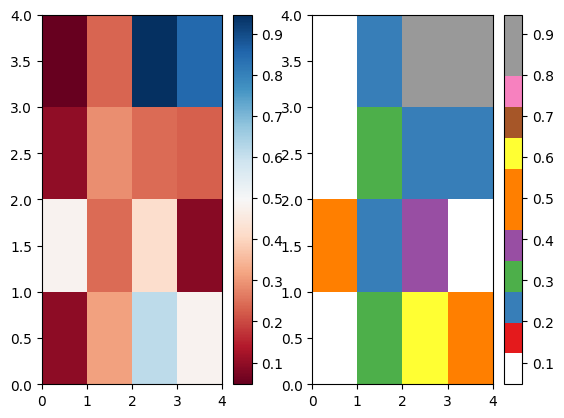

In [4]:
import numpy as np
import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt


# Random data
data1 = np.random.random((4,4))

# Choose colormap
cmap =  plt.get_cmap('Set1', lut=12)
print(cmap)
# Get the colormap colors
my_cmap = cmap(np.arange(cmap.N))
print(my_cmap)
print(my_cmap.shape)
# Set alpha
my_cmap[0,-1] = 0
# Create new colormap
my_cmap = ListedColormap(my_cmap)

pl.figure()
pl.subplot(121)
pl.pcolormesh(data1, cmap=pl.cm.RdBu)
pl.colorbar()

pl.subplot(122)
pl.pcolormesh(data1, cmap=my_cmap)
pl.colorbar()

In [2]:
dsc = data.sel(time="2021-03-01").roll(longitude = 180*4, roll_coords=True)
dscc = dsc.assign_coords(longitude = coordstolongitude(dsc.longitude))
dscc

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440)
Coordinates:
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
    time       datetime64[ns] 2021-03-01
Data variables:
    layer      (latitude, longitude) float32 dask.array<chunksize=(6, 120), meta=np.ndarray>

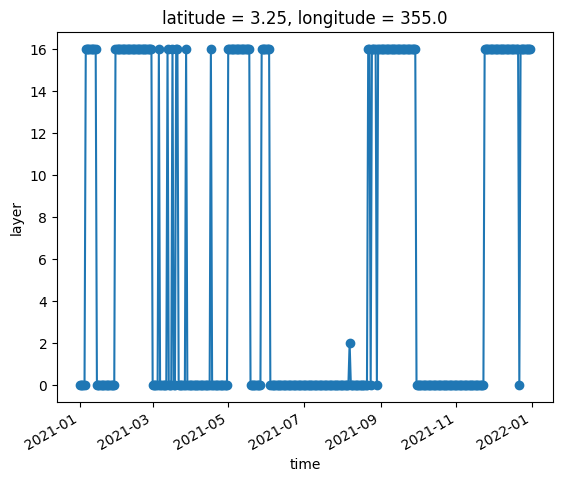

In [3]:
data.sel(longitude = longitudetocoords(-5), latitude=3.36, method = 'nearest').sel(time=slice("2021-01-01", "2021-12-31")).layer.plot.line(x="time", marker = "o")

In [4]:
from pathlib import Path
import datetime
import xarray as xr
import numpy as np
from tqdm import tqdm
import random
import multiprocessing as mp
from scipy.interpolate import interp1d
import os
import sys

basepath = Path("/scratch/crobin/earthnet2023/test_original/")
paths = list(basepath.glob("*/*.nc"))[:5]
print("len of the dataset: ", len(paths))
minicube = xr.open_dataset(paths[0])


len of the dataset:  5


In [5]:
longitude = np.mean(minicube.lon).item()
latitude = np.mean(minicube.lat).item()
time = minicube.time

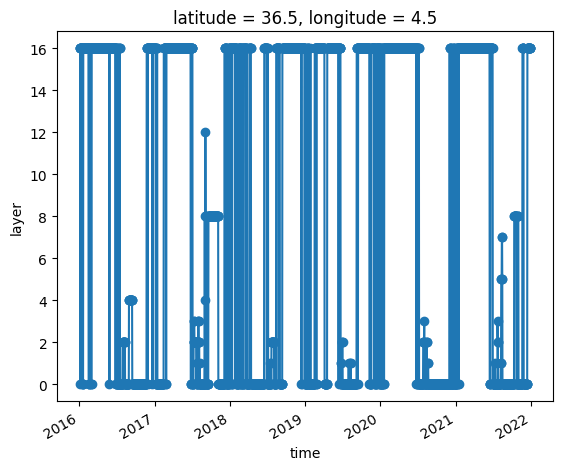

In [6]:
extremes = data.sel(longitude = longitudetocoords(longitude), latitude=latitude, method = 'nearest').sel(time=time).layer.plot.line(x="time", marker = "o")

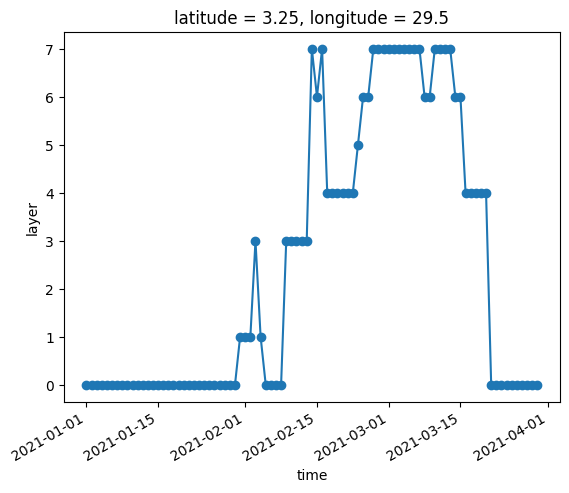

In [50]:
ds.sel(longitude = 29.4, latitude=3.36, method = 'nearest').sel(time=slice("2021-01-01", "2021-3-30")).layer.plot.line(x="time", marker = "o")

In [1]:
import numpy as np

In [7]:
i = 5
arr = np.arange(i, i+20)
np.random.shuffle(arr)
print(arr)

[15 20 21 12 23  6 16 22 14 24 11 17  5 13  7  9 19 10  8 18]


In [ ]:
A = np.arrange(0, 30)
arr = np.arange(i, i+20)
arr1 = 
np.random.shuffle(arr)
A[]

In [37]:
import numpy as np
from itertools import chain
A = np.arange(0, 10)
B = np.arange(0, 10*5)
axis_to_shuffle = 0
# Create an array of indices along the specified dimension
indices = np.arange(A.shape[0])

# Shuffle the indices
np.random.shuffle(indices[5:])
#indices2 = [[*range(i*2,2*i+2)] for i in indices]
indices2 = list(chain.from_iterable(range(i * 5, 5 * i + 5) for i in indices))

# Use the shuffled indices to rearrange the rows along the specified dimension
#shuffled_A = np.take(A, indices, axis=axis_to_shuffle)
#shuffled_B = np.take(B, indices, axis=axis_to_shuffle)

In [38]:
print(indices)
print(indices2)

[0 1 2 3 4 7 5 9 8 6]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 35, 36, 37, 38, 39, 25, 26, 27, 28, 29, 45, 46, 47, 48, 49, 40, 41, 42, 43, 44, 30, 31, 32, 33, 34]


In [45]:
# Create an array of indices along the specified dimension
end_shuffle=5
sentinel = np.array([np.arange(10), np.arange(10), np.arange(10)])
indices = np.arange(0, 10)
print(sentinel)

# Shuffle the indices
np.random.shuffle(indices[0:10 - end_shuffle])

# Use take_along_dim to shuffle along the specified dimension
sentinel = sentinel[:,indices]


[[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
original = [0.08592075109481812]
indices = [1, 3, 5, 10, 15]
local_20 = [0.10078933089971542, 0.091568224132061, 0.08647695928812027, 0.0864815041422844, 0.08626063913106918]
diff_local_20 = [i - original[0] for i in local_20]

local_10 = [0.09370797127485275, 0.0865676999092102, 0.08610672503709793, 0.08604229241609573, 0.08604622632265091]
diff_local_10 = [i - original[0] for i in local_10]

indices2 = [1, 3, 5, 8, 10, 15, 20, 30, 40, 50] 
globally = [0.12836124002933502, 0.10120876878499985, 0.10131847113370895, 0.097715109586715, 0.09727680683135986, 0.09656381607055664, 0.09572281688451767, 0.09365157783031464, 0.09134972840547562, 0.08592083305120468]
diff_global = [i - original[0] for i in globally]

randomly = [0.20672133564949036, 0.18302786350250244, 0.18353204429149628, 0.17661917209625244, 0.169375941157341, 0.16888456046581268, 0.16605105996131897, 0.1662082076072693, 0.15741217136383057, 0.10020072013139725]
diff_random = [i - original[0] for i in randomly]



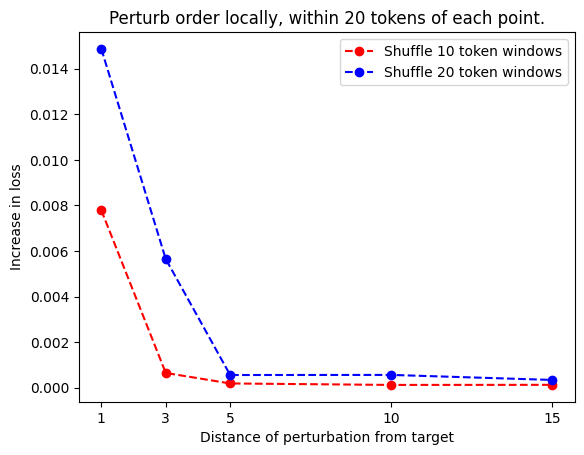

In [3]:
plt.plot(np.array(indices), np.array(diff_local_10), marker='o', linestyle='--', color='r', label='Shuffle 10 token windows')
plt.plot(np.array(indices), np.array(diff_local_20), marker='o', linestyle='--', color='b', label='Shuffle 20 token windows')
plt.xlabel('Distance of perturbation from target')
plt.ylabel('Increase in loss') 
plt.xticks(np.array(indices))
plt.title('Perturb order locally, within 20 tokens of each point.')
plt.legend() 
plt.show()
#plt.plot(diff_global)
#plt.plot(diff_random)


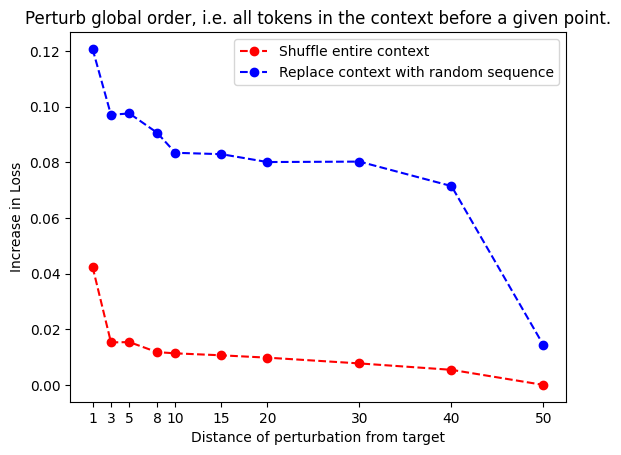

In [8]:

plt.plot(np.array(indices2), np.array(diff_global), marker='o', linestyle='--', color='r', label='Shuffle entire context')
plt.plot(np.array(indices2), np.array(diff_random), marker='o', linestyle='--', color='b', label='Replace context with random sequence')
plt.xlabel('Distance of perturbation from target')
plt.ylabel('Increase in Loss') 
plt.xticks(np.array(indices2))
plt.title('Perturb global order, i.e. all tokens in the context before a given point.')
plt.legend() 
plt.show()

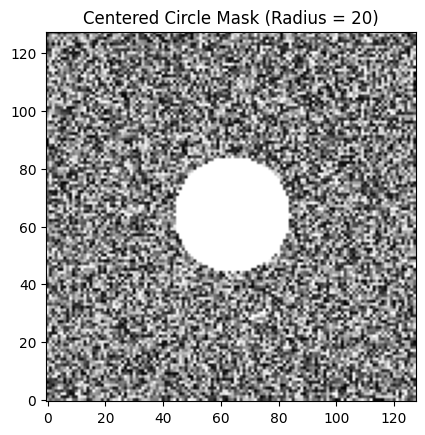

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Size of the array
array_size = (128, 128)

# Radius of the centered circle
radius = 20

# Create a meshgrid of indices
x, y = np.meshgrid(np.arange(array_size[0]), np.arange(array_size[1]))

# Calculate distance from the center for each point in the grid
distance = np.sqrt((x - array_size[0] // 2)**2 + (y - array_size[1] // 2)**2)

# Create a boolean mask for points inside the circle
circle_mask = distance <= radius

# Create an array with shuffled values for points outside the circle
shuffled_values = np.random.rand(np.sum(~circle_mask))

original_array = np.ones((128,128))
# Copy the original array to maintain the original values
shuffled_array = np.copy(original_array)

# Assign shuffled values to pixels outside the circle
shuffled_array[~circle_mask] = shuffled_values

# Visualize the mask (optional)
plt.imshow(shuffled_array, cmap='gray', origin='lower')
plt.title(f'Centered Circle Mask (Radius = {radius})')
plt.show()
